In [114]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
#import wradlib
import pyart

In [115]:
datafile = nc.Dataset('MDV-20150805-084449-PPIVol.nc')
radar=datafile

filename = wradlib.util.get_wradlib_data_file('dx/raa00-dx_10908-0806021735-fbg---bin.gz')
print(filename)

In [116]:
#datafile

In [117]:
#datafile.variables

In [118]:
dir(radar)

['Conventions',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__orthogonal_indexing__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '_close',
 '_close_mem',
 '_enddef',
 '_getname',
 '_grpid',
 '_isopen',
 '_ncstring_attrs__',
 '_redef',
 'close',
 'cmptypes',
 'comment',
 'createCompoundType',
 'createDimension',
 'createEnumType',
 'createGroup',
 'createVLType',
 'createVariable',
 'data_model',
 'delncattr',
 'dimensions',
 'disk_format',
 'enumtypes',
 'file_format',
 'filepath',
 'get_variables_by_attributes',
 'getncattr',
 'groups',
 'history',
 'institution',
 'instrument_name',
 'isopen',
 'keepweakref',
 'n_gates_vary',
 'name',
 'ncattrs',
 'parent',
 'path',
 'refe

In [119]:
for i in radar.variables:
    print(i)

volume_number
latitude
longitude
altitude
time_coverage_start
time_coverage_end
time
azimuth
elevation
radar_antenna_gain_h
radar_antenna_gain_v
radar_beam_width_h
radar_beam_width_v
radar_receiver_bandwidth
frequency
radar_measured_transmit_power_h
radar_measured_transmit_power_v
pulse_width
prt
prt_ratio
nyquist_velocity
n_samples
prt_mode
polarization_mode
range
sweep_number
sweep_mode
fixed_angle
sweep_start_ray_index
sweep_end_ray_index
DBZH
DBZV
VELH
VELV


In [120]:
data_dbz=radar.variables['DBZH'][:].data

data_dbz[data_dbz==-32768]=np.nan
data_dbz.shape

(9270, 2500)

In [121]:
mask_dbzh=radar.variables['DBZH'][:].mask

In [122]:
mask_dbzh

array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

In [123]:
vleh=pd.DataFrame(radar.variables['VELH'][:].data)

In [124]:
vleh=vleh.replace(-32768,np.nan)

In [125]:
vleh=vleh.values*mask_dbzh

In [155]:
~mask_dbzh

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

In [137]:
data_dbz[:5,:]

array([[10.5, 15. , 16.5, ...,  nan,  nan,  nan],
       [ 8. , 14. , 16.5, ...,  nan,  nan,  nan],
       [ 9.5, 13.5, 15. , ...,  nan,  nan,  nan],
       [ 8. , 12.5, 16. , ...,  nan, 14. , 15. ],
       [ 9.5, 13. , 16. , ..., 16. , 15.5, 13.5]], dtype=float32)

In [151]:
# vleh_1=vleh[mask_dbzh]
np_vleh=np.array(vleh)
pd_dbzh=pd.DataFrame(~mask_dbzh)
vleh111=vleh[pd_dbzh]

In [158]:
vleh111.shape

(9270, 2500)

In [150]:
mask_dbzh=radar.variables['DBZH'][:].mask
vleh=pd.DataFrame(radar.variables['VELH'][:].data)
vleh=vleh.replace(-32768,np.nan)

In [152]:
import netCDF4 as nc
import pyart
radar = pyart.io.read('MDV-20150805-084449-PPIVol.nc')
mask_dict = {'data': vleh111, 'units': 'm/s', 'long_name': 'corr_vel',
            'standard_name': 'vleh'}
radar.add_field('vleh111',mask_dict)

In [109]:
import netCDF4 as nc
import pyart
radar = pyart.io.read('MDV-20150805-084449-PPIVol.nc')
mask_dict = {'data': data_dbz, 'units': 'dbz', 'long_name': 'DBZ',
            'standard_name': 'DBZ'}
radar.add_field('data_dbz',mask_dict)

In [110]:
radar.fields.keys()

dict_keys(['DBZH', 'DBZV', 'VELH', 'VELV', 'data_dbz'])

/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/radarmapdisplay.py:256: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes.
  warnings.warn("No projection was defined for the axes."
/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/radarmapdisplay.py:507: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.get_path().vertices.tolist())
/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/radarmapdisplay.py:507: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.get_path().vertices.tolist())
/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/radarmapdisplay.py:256: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes.
  warnings.warn("No projection was defined for the axes."
/opt/anaco

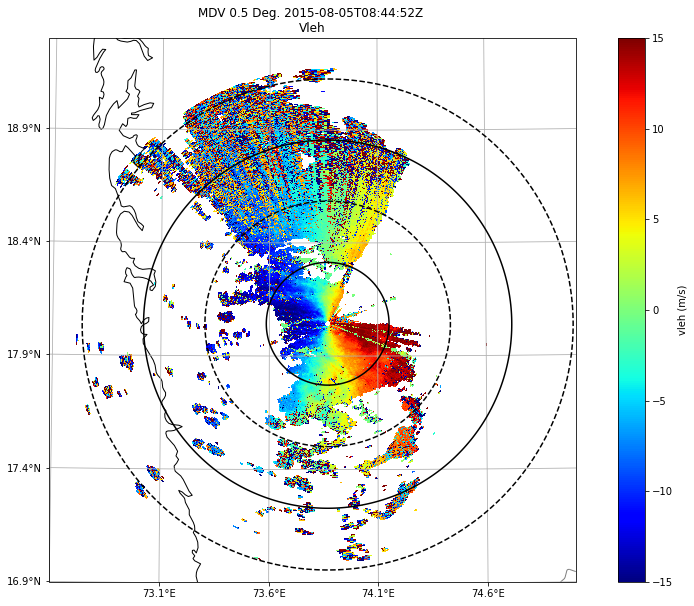

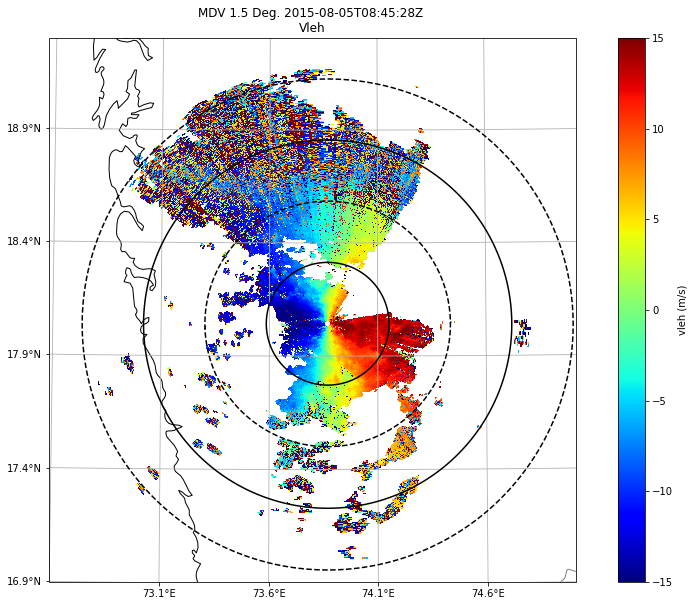

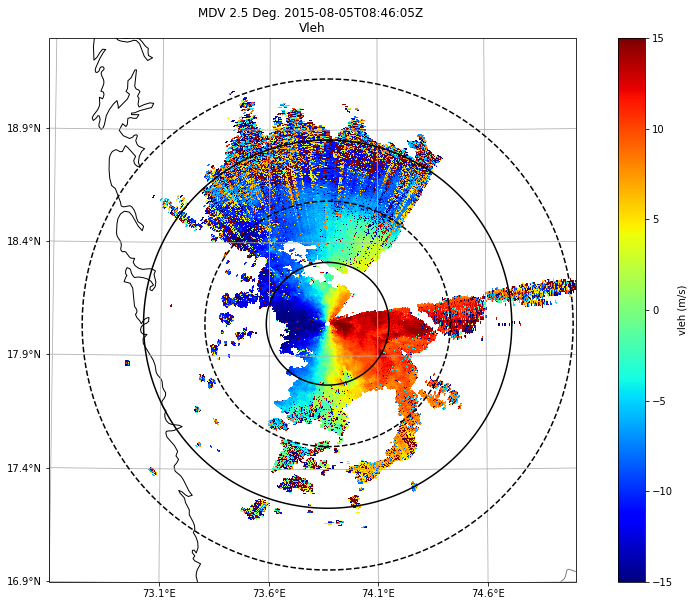

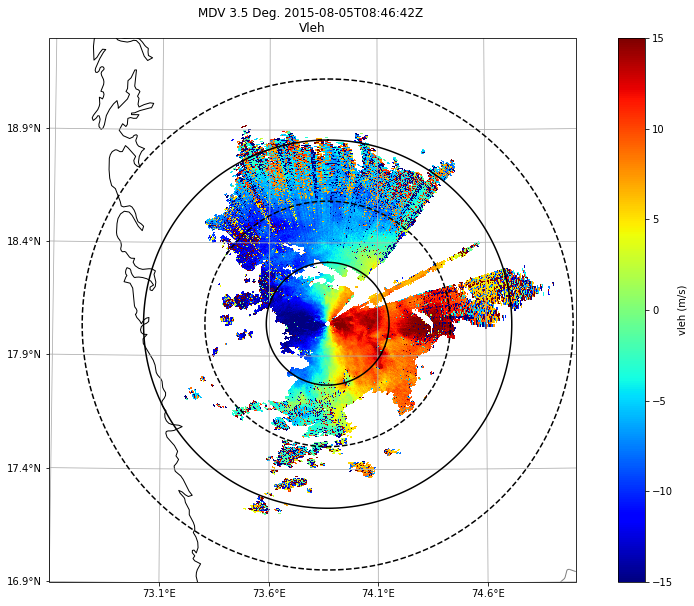

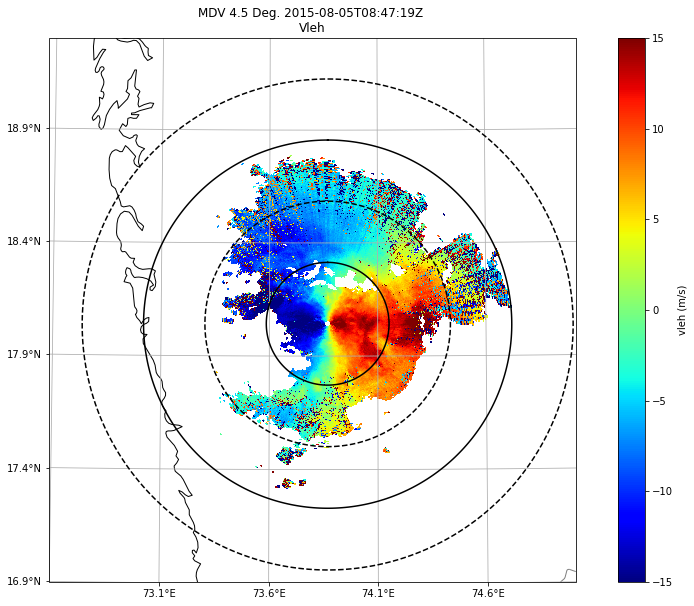

In [156]:
for i in range(5):
    fig = plt.figure(figsize=(15,10))
    display = pyart.graph.RadarMapDisplay(radar)
    display.plot_ppi_map('vleh111',i,vmin=-15,vmax=15, min_lon=72.6, max_lon=75, min_lat=16.9, max_lat=19.3,
                         lon_lines=np.arange(72.6,75, .5), resolution='10m',
                         lat_lines=np.arange(16.9,19.3, .5),
                         fig=fig, lat_0=radar.latitude['data'][0],
                         lon_0=radar.longitude['data'][0],cmap='jet')

    display.plot_range_ring(30., line_style='k-')
    display.plot_range_ring(60., line_style='k--')
    display.plot_range_ring(90., line_style='k-')
    display.plot_range_ring(120., line_style='k--')

/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/radarmapdisplay.py:256: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes.
  warnings.warn("No projection was defined for the axes."
/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/radarmapdisplay.py:507: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.get_path().vertices.tolist())
/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/radarmapdisplay.py:507: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.get_path().vertices.tolist())


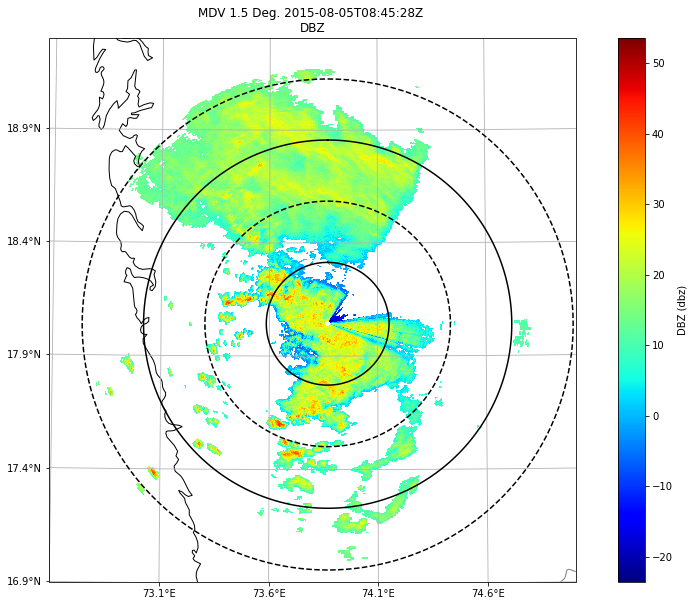

In [111]:
fig = plt.figure(figsize=(15,10))
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('data_dbz',1, min_lon=72.6, max_lon=75, min_lat=16.9, max_lat=19.3,
                     lon_lines=np.arange(72.6,75, .5), resolution='10m',
                     lat_lines=np.arange(16.9,19.3, .5),
                     fig=fig, lat_0=radar.latitude['data'][0],
                     lon_0=radar.longitude['data'][0],cmap='jet')

display.plot_range_ring(30., line_style='k-')
display.plot_range_ring(60., line_style='k--')
display.plot_range_ring(90., line_style='k-')
display.plot_range_ring(120., line_style='k--')

In [14]:
data_dbz[data_dbz==-3.2768e+04]=np.nan

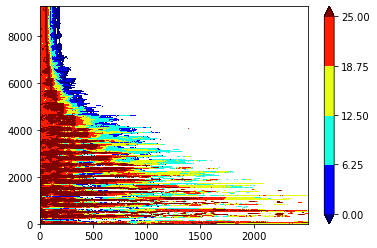

In [15]:
clr=np.linspace(0,25,5)
cb=plt.contourf(data_dbz,clr,cmap='jet',extend='both')
plt.colorbar(cb)

In [16]:
b=1.4
a=300

In [20]:
z=data_dbz.copy()
z

array([[10.5, 15. , 16.5, ...,  nan,  nan,  nan],
       [ 8. , 14. , 16.5, ...,  nan,  nan,  nan],
       [ 9.5, 13.5, 15. , ...,  nan,  nan,  nan],
       ...,
       [ 8.5, 11.5, 14. , ...,  nan,  nan,  nan],
       [ 8.5, 11.5, 14. , ...,  nan,  nan,  nan],
       [ 7.5, 12. , 16. , ...,  nan,  nan,  nan]], dtype=float32)

In [22]:
R=(z/a)**(1/b)

<ipython-input-22-9a80094191a8>:1: RuntimeWarning: invalid value encountered in power
  R=(z/a)**(1/b)


In [23]:
filename = 'MDV-20150805-084449-PPIVol.nc'
radar = pyart.io.read(filename)
display = pyart.graph.RadarMapDisplay(radar)

In [24]:
radar.fields.keys()

dict_keys(['DBZH', 'DBZV', 'VELH', 'VELV'])

In [25]:
data_lat=datafile.variables['latitude'][:].data
data_lon=datafile.variables['longitude'][:].data

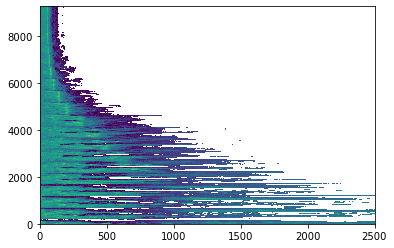

In [26]:
plt.pcolormesh(R)

In [27]:
R.shape

(9270, 2500)

In [29]:

plt.figure()
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
axes.contourf(R.Longitude,R.Latitude,R,transform=ccrs.PlateCarree(),levels=np.arange(0,100,5),cmap='jet')
#axes.set_xticks([60,70,80,90,100,110,120], crs=ccrs.PlateCarree())
#axes.set_yticks([0,10,20,30,40], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
axes.xaxis.set_major_formatter(lon_formatter)
axes.yaxis.set_major_formatter(lat_formatter)
#plt.ylim([0, 40])
#plt.xlim([60,120])
axes.coastlines()
plt.xlabel('Longitude[degree_east]')
plt.ylabel('Lattitude[degree_north]')
plt.title('LIS Flash Rate Climatology(HRFC_LIS_FR)')
plt.legend()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'Longitude'

<Figure size 432x288 with 0 Axes>

# Compute areas and colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.contourf(R)


In [ ]:
projection = ccrs.LambertConformal(central_latitude=radar.latitude['data'][0],
                                   central_longitude=radar.longitude['data'][0])

In [ ]:
radar.longitude['data'][0],radar.latitude['data'][0]

In [ ]:
fig = plt.figure(figsize=[20,8])
df = display.plot_ppi_map('DBZH', 1, vmin=10, vmax=30,
                     min_lon=72.6, max_lon=75, min_lat=16.9, max_lat=19.3,
                     lon_lines=np.arange(72.6,75, .5), resolution='10m',
                     lat_lines=np.arange(16.9,19.3, .5), projection=projection,
                     fig=fig, lat_0=radar.latitude['data'][0],
                     lon_0=radar.longitude['data'][0],cmap='jet')


# Plot range rings at 10, 20, 30, 40km
display.plot_range_ring(30., line_style='k-')
display.plot_range_ring(60., line_style='k--')
display.plot_range_ring(90., line_style='k-')
display.plot_range_ring(120., line_style='k--')
# Plot cross hairs
#display.plot_line_xy(np.array([-120000.0, 120000.0]), np.array([0.0, 0.0]),
                     #line_style='k-')
#display.plot_line_xy(np.array([0.0, 0.0]), np.array([-20000.0, 200000.0]),
                     #line_style='k-')

# Indicate the radar location with a point
# display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0])

fig.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=([15,8]))
ax = fig.add_subplot(111)
ax.imshow(R)

plt.show()

In [ ]:
R.shape

In [ ]:
pd.DataFrame(R)

In [ ]:
(pd.DataFrame(R)).to_csv('Rainfall_rate.csv')

In [ ]:
clr_rb=np.linspace(0,0.25,7)
rb=plt.contourf(R,clr_rb,cmap='jet',extend='both')
plt.colorbar(rb)
plt.title('Rainrate')

In [ ]:
display = pyart.graph.RadarDisplay(radar)

In [ ]:
projection = ccrs.LambertConformal(central_latitude=radar.latitude['data'][0],
                                   central_longitude=radar.longitude['data'][0])

In [ ]:
fig1 = display.plot('DBZH', sweep=1, vmin=-10, vmax=60)
plt.grid()

In [ ]:
display.plot('DBZH', sweep=4, vmin=-10, vmax=60)
plt.grid()

In [ ]:
fig = plt.figure(figsize=[12,8])
display.plot('DBZH', sweep=0, vmin=-10, vmax=60)
plt.grid()


In [ ]:
radar.longitude['data'][0],radar.latitude['data'][0]

In [ ]:
fig = plt.figure(figsize=[12,8],dpi=300)
display.plot_ppi_map('DBZH', 1, vmin=-10, vmax=60,
                     min_lon=72.6, max_lon=75, min_lat=16.9, max_lat=19.3,
                     lon_lines=np.arange(72.6,75, .5), resolution='10m',
                     lat_lines=np.arange(16.9,19.3, .5), projection=projection,
                     fig=fig, lat_0=radar.latitude['data'][0],
                     lon_0=radar.longitude['data'][0],cmap='jet')
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
display.plot('DBZH')
plt.show()

In [ ]:
#masked=datafile.variables['DBZH'][:].mask

In [ ]:
#=data_dbz*masked

In [ ]:
#plt.contourf(c)

In [ ]:
#c

In [ ]:
#c.shape

In [ ]:
#pd.DataFrame(c)

In [ ]:
#c[c==-32768]=np.nan

In [ ]:
#((pd.DataFrame(c)).min()).max()

In [ ]:
#cb=plt.contourf(c)
#plt.colorbar(cb)

In [15]:
abc = np.array(data_dbz)

In [16]:
abc

array([[ 1.0500e+01,  1.5000e+01,  1.6500e+01, ..., -3.2768e+04,
        -3.2768e+04, -3.2768e+04],
       [ 8.0000e+00,  1.4000e+01,  1.6500e+01, ..., -3.2768e+04,
        -3.2768e+04, -3.2768e+04],
       [ 9.5000e+00,  1.3500e+01,  1.5000e+01, ..., -3.2768e+04,
        -3.2768e+04, -3.2768e+04],
       ...,
       [ 8.5000e+00,  1.1500e+01,  1.4000e+01, ..., -3.2768e+04,
        -3.2768e+04, -3.2768e+04],
       [ 8.5000e+00,  1.1500e+01,  1.4000e+01, ..., -3.2768e+04,
        -3.2768e+04, -3.2768e+04],
       [ 7.5000e+00,  1.2000e+01,  1.6000e+01, ..., -3.2768e+04,
        -3.2768e+04, -3.2768e+04]], dtype=float32)

In [19]:
abc = pd.DataFrame(data_dbz)

In [20]:
abc

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,10.5,15.0,16.5,18.0,19.5,20.0,24.0,26.0,21.0,18.5,...,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0
1,8.0,14.0,16.5,17.5,19.0,19.5,22.5,24.5,23.5,23.5,...,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0
2,9.5,13.5,15.0,17.0,19.0,21.5,21.0,21.0,23.5,25.0,...,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0
3,8.0,12.5,16.0,19.5,21.0,24.5,25.5,25.5,25.5,28.0,...,14.0,14.0,13.5,14.5,14.5,15.0,14.5,-32768.0,14.0,15.0
4,9.5,13.0,16.0,19.0,24.0,26.0,23.5,22.0,23.0,24.0,...,-32768.0,14.5,13.5,14.0,14.0,14.0,14.5,16.0,15.5,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9265,9.5,13.0,14.5,17.0,17.5,19.0,20.5,21.0,20.0,19.5,...,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0
9266,9.0,13.0,14.5,19.0,19.5,22.5,23.5,21.5,19.5,19.0,...,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0
9267,8.5,11.5,14.0,15.5,17.0,19.0,20.0,19.5,20.0,21.0,...,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0
9268,8.5,11.5,14.0,16.5,17.0,19.5,20.0,20.0,20.5,21.0,...,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0,-32768.0


In [ ]:
vleh=pd.DataFrame(radar.variables['VELH'][:].data)

In [21]:
mask_rvel=radar.variables['VELH'][:].mask

In [55]:
mask_rvel.shape,mask_dbzh.shape

((9270, 2500), (9270, 2500))

In [56]:
pd_rvl=pd.DataFrame(mask_rvel)
pd_dbz=pd.DataFrame(mask_dbzh)
pd_rvl.shape,pd_dbz.shape

((9270, 2500), (9270, 2500))

In [57]:
mask_rvel1 = pd_rvl[pd_dbz]
mask_rvel1.shape

(9270, 2500)

In [58]:
import netCDF4 as nc
import pyart
mask_dict = {'data': mask_rvel1, 'units': 'm/s', 'long_name': 'corr_vel',
            'standard_name': 'rvel'}
radar.add_field('rvel',mask_dict)

In [59]:
radar.fields.keys()

dict_keys(['DBZH', 'DBZV', 'VELH', 'VELV', 'rvel'])

/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/radarmapdisplay.py:256: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes.
  warnings.warn("No projection was defined for the axes."
/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/radarmapdisplay.py:507: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.get_path().vertices.tolist())
/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/radarmapdisplay.py:507: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.get_path().vertices.tolist())


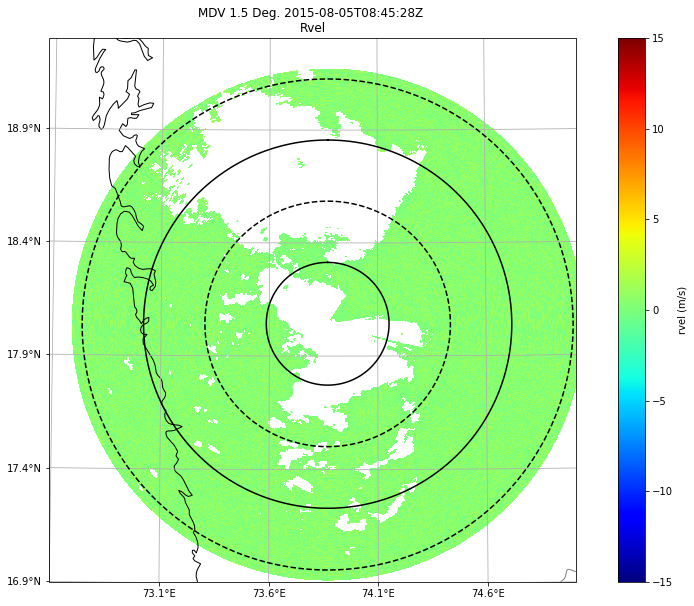

In [61]:
fig = plt.figure(figsize=(15,10))
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('rvel',1, vmin=-15, vmax=15,min_lon=72.6, max_lon=75, min_lat=16.9, max_lat=19.3,
                     lon_lines=np.arange(72.6,75, .5), resolution='10m',
                     lat_lines=np.arange(16.9,19.3, .5),
                     fig=fig, lat_0=radar.latitude['data'][0],
                     lon_0=radar.longitude['data'][0],cmap='jet')

display.plot_range_ring(30., line_style='k-')
display.plot_range_ring(60., line_style='k--')
display.plot_range_ring(90., line_style='k-')
display.plot_range_ring(120., line_style='k--')

In [51]:
mask_rvel1 = mask_rvel[mask_dbzh]

In [53]:
mask_rvel1.shape

(17888818,)

In [47]:
#pd_dbzh=pd.DataFrame(mask_dbzh)
dbz = np.array(mask_dbzh)
rvel=np_rvl[dbz]

In [48]:
rvel.shape

(17888818,)

In [49]:
pd_msk_rvel.shape

(9270, 2500)

In [34]:
import netCDF4 as nc
import pyart
radar = pyart.io.read('MDV-20150805-084449-PPIVol.nc')
mask_dict = {'data': msk_rvel, 'units': 'm/s', 'long_name': 'corr_vel',
            'standard_name': 'msk_rvel'}
radar.add_field('msk_rvel',mask_dict)

ValueError: 'data' has invalid shape, should be (9270, 2500)